In [9]:
### Function Imports
from OptionsFunctions import set_price_and_strike, daily_returns, compute_sigma, black_scholes, hedge_pos_and_rets, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics
import pandas as pd


In [10]:
### Call Function to Get Most Recent Stock Price and Set Strike
pair = 'USDJPY=X'
start_date = '2023-07-01'
end_date = '2024-07-01'

forex_data, S_0, K = set_price_and_strike(pair, start_date, end_date, option_type = 'call')
print(forex_data)
print('The Spot Price is:', round(S_0, 4))
print('The pre-determined Strike Price is:', round(K, 4))


[*********************100%%**********************]  1 of 1 completed

          Date    USDJPY=X
0   2023-07-03  144.397995
1   2023-07-04  144.584000
2   2023-07-05  144.406006
3   2023-07-06  144.488998
4   2023-07-07  143.951004
..         ...         ...
255 2024-06-24  159.860992
256 2024-06-25  159.686005
257 2024-06-26  159.686005
258 2024-06-27  160.621002
259 2024-06-28  160.686996

[260 rows x 2 columns]
The Spot Price is: 160.687
The pre-determined Strike Price is: 163.9007


In [11]:
### Function Call to Compute Daily Returns
daily_rets = daily_returns(forex_data)
print(daily_rets)


          Date  USDJPY=X
0   2023-07-04  0.001288
1   2023-07-05 -0.001231
2   2023-07-06  0.000575
3   2023-07-07 -0.003723
4   2023-07-10 -0.012101
..         ...       ...
254 2024-06-24  0.005852
255 2024-06-25 -0.001095
256 2024-06-26  0.000000
257 2024-06-27  0.005855
258 2024-06-28  0.000411

[259 rows x 2 columns]


In [12]:
### Return Computed Sigma Value
sigma = compute_sigma(daily_rets)
print('The sigma value was computed to be:', round(sigma, 5))


The sigma value was computed to be: 0.0843


In [13]:
### Call Function to Compute Option Premium and Greeks
r = 0.02
r_f = 0.01
T = 1
option_type = 'call'
option_price, delta, gamma, theta, rho, vega, prob_ITM_call, prob_ITM_put, prob_exercise_call, prob_exercise_put = black_scholes(S_0, K, r, r_f, T, sigma, option_type)

# Print and explain values
print(f"Option Type: {option_type}")
print(f"Option Price: {option_price:.4f}")
print(f"Delta: {delta:.4f} - Delta represents the sensitivity of the option's price to changes in the underlying asset's price (prob option finishes ITM)")
print(f"Gamma: {gamma:.4f} - Gamma measures the rate of change of Delta with respect to changes in the underlying price.")
print(f"Theta: {theta:.4f} - Theta measures the sensitivity of the option's price to the passage of time.")
print(f"Rho: {rho:.4f} - Rho measures the sensitivity of the option's price to changes in the risk-free interest rate.")
print(f"Vega: {vega:.4f} - Vega measures the sensitivity of the option's price to changes in the volatility of the underlying asset.")
print(f"Probability ITM (Call): {prob_ITM_call:.4f} - Probability the call option finishes In The Money.")
print(f"Probability ITM (Put): {prob_ITM_put:.4f} - Probability the put option finishes In The Money.")
print(f"Probability of Exercise (Call): {prob_exercise_call:.4f} - Probability the call option will be exercised.")
print(f"Probability of Exercise (Put): {prob_exercise_put:.4f} - Probability the put option will be exercised.")


Option Type: call
Option Price: 4.6276
Delta: 0.4658 - Delta represents the sensitivity of the option's price to changes in the underlying asset's price (prob option finishes ITM)
Gamma: 0.0291 - Gamma measures the rate of change of Delta with respect to changes in the underlying price.
Theta: -3.3236 - Theta measures the sensitivity of the option's price to the passage of time.
Rho: 70.2156 - Rho measures the sensitivity of the option's price to changes in the risk-free interest rate.
Vega: 63.2928 - Vega measures the sensitivity of the option's price to changes in the volatility of the underlying asset.
Probability ITM (Call): 0.4705 - Probability the call option finishes In The Money.
Probability ITM (Put): 0.5295 - Probability the put option finishes In The Money.
Probability of Exercise (Call): 0.4371 - Probability the call option will be exercised.
Probability of Exercise (Put): 0.5629 - Probability the put option will be exercised.


In [14]:
### Call Hedged Rets Function
long_pos = 1000  # units of currency pair (not dollars)
hedge_pos, hedged_rets = hedge_pos_and_rets(daily_rets, delta, long_pos)
print('The computed short (delta) hedge position is:', round(hedge_pos, 4))
print("Hedged Returns:")
print(hedged_rets.head())


The computed short (delta) hedge position is: -465.7703
Hedged Returns:
     USDJPY=X
0 -465.769043
1 -465.771562
2 -465.769756
3 -465.774055
4 -465.782432


In [15]:
### Call Calculated Hedged/Unhedged Returns Function
hedge_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(pair, long_pos, daily_rets, delta)
print("Hedged Cumulative Returns:")
print(hedged_cumulative_rets.tail())
print("Unhedged Cumulative Returns:")
print(unhedged_cumulative_rets.tail())


Hedged Cumulative Returns:
Date
2024-06-24    1549.046963
2024-06-25    1548.141109
2024-06-26    1548.141109
2024-06-27    1552.983749
2024-06-28    1553.324627
Name: USDJPY=X, dtype: float64
Unhedged Cumulative Returns:
Date
2024-06-24    1107.085957
2024-06-25    1105.874113
2024-06-26    1105.874113
2024-06-27    1112.349255
2024-06-28    1112.806286
Name: USDJPY=X, dtype: float64


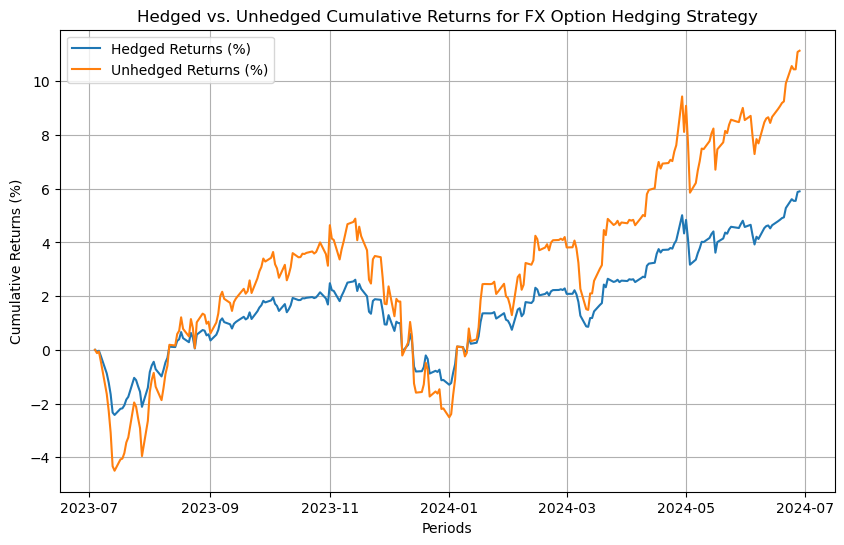

In [16]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [17]:
### Call Performence Metrics Function
performance_metrics(long_pos, hedge_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_rets)



Performance Metrics for Hedged and Unhedged Positions
Metric                                  Hedged        Unhedged
Total Returns (%)                       5.9733         11.2806
Annualized Returns (%)                  5.8072         10.9596
Mean Return                             0.0570          0.1067
Standard Deviation                      0.0451          0.0845
Sharpe Ratio                            1.2638          1.2638

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 1.2638,
which means for every unit of risk, the hedged portfolio is generating 1.2638 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 1.2638,
indicating that for every unit of risk, the unhedged portfolio is generating 1.2638 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
